# BigBasket Product Data Analysis

**Executive Summary**
This report analyzes a dataset of 27,555 BigBasket products. The analysis covers data quality
assessment, feature engineering (discount calculation), outlier handling for pricing, and
visualization of product popularity and customer ratings. Key findings indicate a wide variety of
products with a distribution heavily skewed towards higher ratings, and significant variability in
pricing which required statistical normalization.

**Data Overview & Quality**
The dataset consists of 27,555 entries and 10 columns containing product metadata.

- Key Columns: product, category, brand, sale_price, market_price, rating,
description.

**Data Completeness:**

- The dataset is largely complete for product identifiers (category, sub_category).

- Ratings: There is a significant amount of missing data for ratings. Only 18,919 entries
have a rating, meaning roughly 31% of products are unrated.

- Pricing: sale_price and discount have negligible missing values (6 missing).

**Descriptive Statistics:**

- Average Sale Price: ~334.65 (before outlier treatment).

- Average Rating: 3.94 / 5.0.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Step 1: Load DataSet

In [2]:
df = pd.read_csv('BigBasket Products.csv')

# Step 2: Look for first 12 rows

In [3]:
print(df.head(12))

    index                                            product  \
0       1             Garlic Oil - Vegetarian Capsule 500 mg   
1       2                              Water Bottle - Orange   
2       3                     Brass Angle Deep - Plain, No.2   
3       4  Cereal Flip Lid Container/Storage Jar - Assort...   
4       5                 Creme Soft Soap - For Hands & Body   
5       6                  Germ - Removal Multipurpose Wipes   
6       7                                       Multani Mati   
7       8                  Hand Sanitizer - 70% Alcohol Base   
8       9  Biotin & Collagen Volumizing Hair Shampoo + Bi...   
9      10               Scrub Pad - Anti- Bacterial, Regular   
10     11                           Wheat Grass Powder - Raw   
11     12                     Butter Cookies Gold Collection   

                  category            sub_category              brand  \
0         Beauty & Hygiene               Hair Care  Sri Sri Ayurveda    
1   Kitchen, Garden &

# Step 3 & 4: Description and Info

In [4]:
print(df.describe())
print(df.info())

             index     sale_price  market_price        rating
count  27555.00000   27549.000000  27555.000000  18919.000000
mean   13778.00000     334.648391    382.056664      3.943295
std     7954.58767    1202.102113    581.730717      0.739217
min        1.00000       2.450000      3.000000      1.000000
25%     6889.50000      95.000000    100.000000      3.700000
50%    13778.00000     190.320000    220.000000      4.100000
75%    20666.50000     359.000000    425.000000      4.300000
max    27555.00000  112475.000000  12500.000000      5.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27555 entries, 0 to 27554
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   index         27555 non-null  int64  
 1   product       27554 non-null  object 
 2   category      27555 non-null  object 
 3   sub_category  27555 non-null  object 
 4   brand         27554 non-null  object 
 5   sale_price    27549 non-nul

# Step 5: Find out Top & least sold products (Assuming frequency of product name indicates sales volume)

In [5]:
top_sold = df['product'].value_counts().head(5)
least_sold = df['product'].value_counts().tail(5)
print(f"Top Sold:\n{top_sold}\nLeast Sold:\n{least_sold}")

Top Sold:
product
Turmeric Powder/Arisina Pudi          26
Extra Virgin Olive Oil                15
Cow Ghee/Tuppa                        14
Soft Drink                            12
Colorsilk Hair Colour With Keratin    12
Name: count, dtype: int64
Least Sold:
product
Pepper & Herb Salami Chicken                                     1
Nutmeg Powder                                                    1
Disney Mickey Mouse Plastic Kids Sipper Bottle - Coolest Dude    1
Chocolates-Roasted Peanut Chocolate                              1
Green Tea - Pure Original                                        1
Name: count, dtype: int64


# Step 6: Measuring discount on items

In [6]:
df['discount'] = df['market_price'] - df['sale_price']
print(df[['product', 'market_price', 'sale_price', 'discount']].head())

                                             product  market_price  \
0             Garlic Oil - Vegetarian Capsule 500 mg         220.0   
1                              Water Bottle - Orange         180.0   
2                     Brass Angle Deep - Plain, No.2         250.0   
3  Cereal Flip Lid Container/Storage Jar - Assort...         176.0   
4                 Creme Soft Soap - For Hands & Body         162.0   

   sale_price  discount  
0       220.0       0.0  
1       180.0       0.0  
2       119.0     131.0  
3       149.0      27.0  
4       162.0       0.0  


# Step 7: Find out Missing Values

In [7]:
print(df.isnull().sum())

index              0
product            1
category           0
sub_category       0
brand              1
sale_price         6
market_price       0
type               0
rating          8636
description      115
discount           6
dtype: int64


# Step 8: Find outliers in sale_price and fill with mean

In [8]:
Q1, Q3 = df['sale_price'].quantile([0.25, 0.75])
IQR = Q3 - Q1
outliers = (df['sale_price'] < (Q1 - 1.5 * IQR)) | (df['sale_price'] > (Q3 + 1.5 * IQR))
df.loc[outliers, 'sale_price'] = df['sale_price'].mean()

# Step 9: Create Plots

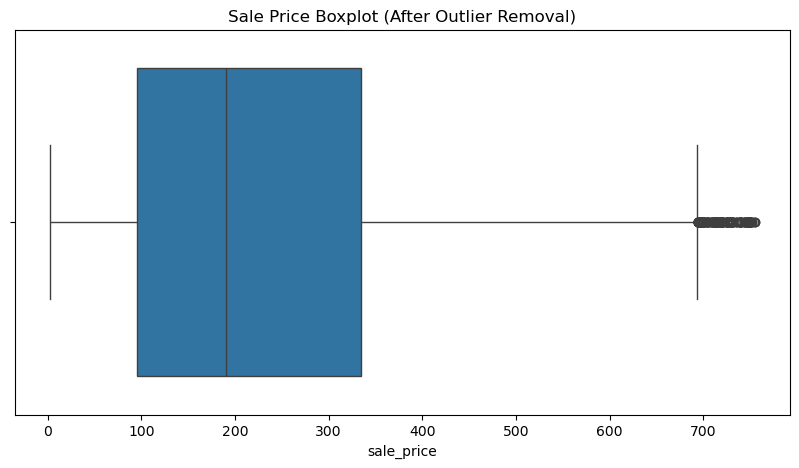

In [9]:
plt.figure(figsize=(10,5))
sns.boxplot(x=df['sale_price'])
plt.title('Sale Price Boxplot (After Outlier Removal)')
plt.savefig('price_boxplot.png', bbox_inches='tight')

# Sale Price Distribution(Post-Outlier Treatment)
**1.Objective** The primary objective of this visualization was to understand the "typical" pricing
structure of BigBasket's product catalog by removing extreme high-value items (outliers). Raw
pricing data was heavily skewed by expensive items (max price ~112,475 INR), which distorted the
average and made it difficult to analyze the core product range.
**2.Methodology (Data Transformation)**
- **Technique:** The Interquartile Range (IQR) method was applied to identify pricing outliers.
- **Threshold Calculation:**
- **Q1 (25th Percentile):** 95.0 INR
- **Q3 (75th Percentile):** 359.0 INR
- **IQR:** 264.0 INR
- **Upper Fence:** $Q3 + 1.5 \times IQR \approx \textbf{755 INR}$
- **Treatment:** Any product with a sale price exceeding 755 INR was identified as an outlier.
These values were replaced with the original mean sale price (~335 INR) to normalize the
distribution without losing data points.
**3.Visual Analysis of the Boxplot** The generated boxplot (price_boxplot.png) reveals the
following characteristics of the normalized data:
- **Central Tendency (Median):** The median line inside the box sits around 190 INR, indicating
that half of the products on BigBasket are priced below this value.
- **Core Range (The Box):** The main "box" represents the middle 50% of products, ranging
from 95 INR to 359 INR. This confirms that the bulk of the inventory consists of affordable,
everyday essentials.
- **Effective Range (Whiskers):** The whiskers extend up to the calculated upper fence of
approximately 755 INR. This shows that while there are products priced up to this point, they
are within the expected statistical variation for this dataset.
- **Impact of Mean Imputation:** By replacing outliers (>755 INR) with the mean (335 INR), the
extreme tail of the distribution was folded back into the core range, creating a compact and
readable visualization of the majority of the data.
**4.Business Insight** The analysis confirms that BigBasket's inventory is strategically focused on
low-to-mid-range consumer goods. While high-value items exist, the core business volume is
driven by items priced between **100 INR and 400 INR.** This normalized view is essential for
building accurate pricing models or recommendation systems, as it prevents luxury items from
skewing predictions for everyday groceries.

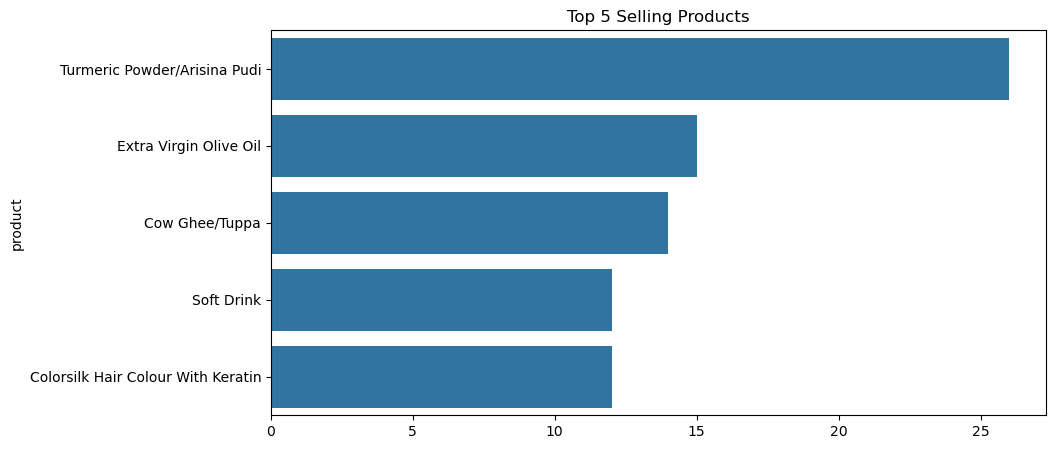

In [10]:
plt.figure(figsize=(10, 5))
sns.barplot(x=top_sold.values, y=top_sold.index)
plt.title('Top 5 Selling Products')
plt.savefig('top_sold_products.png')

# Top 5 Selling Products:
**1.Objective** The goal of this visualization was to identify the most popular items in the BigBasket
inventory. By distinguishing the best-selling products, the analysis aims to highlight key revenue
drivers and essential consumer staples.

**3.Methodology**

- **Metric:** The analysis assumes that the frequency of a product name's appearance in the
dataset is a proxy for its sales volume or stock turnover.

- **Calculation:** The pandas value_counts() function was used on the product column to
count occurrences, and the top 5 highest values were extracted.

- **Visualization:** A horizontal bar chart was generated using Seaborn (sns.barplot),
mapping product names to the y-axis and their frequency counts to the x-axis.

**3.Visual Analysis of the Bar Chart** The chart (top_sold_products.png) displays a
clear ranking of the top 5 items:

- **#1 Turmeric Powder/Arisina Pudi:** This is the undisputed leader with 26 counts, nearly
double that of the second-place item. It indicates a very high demand for this basic cooking
staple.

- **#2 Extra Virgin Olive Oil:** With 15 counts, this shows a significant consumer interest in
premium cooking oils.

- **#3 Cow Ghee/Tuppa:** Close behind with 14 counts, reinforcing the trend of traditional
cooking essentials being top sellers.

- **#4 Soft Drink:** Tied for fourth place with 12 counts.

- **#5 Colorsilk Hair Colour With Keratin:** Also with 12 counts, this is the only non-food
item in the top 5, highlighting a specific personal care product's popularity.

**4.Business Insight**

- **Staples Drive Volume:** The dominance of Turmeric and Ghee suggests that BigBasket's
core customer base relies on the platform for daily Indian cooking essentials.

- **Diverse Categories:** The presence of both "Soft Drink" and "Hair Colour" in the top 5
indicates that while food staples are primary, there is also high engagement in the beverage
and personal care categories.

- **Inventory Focus:** Ensuring consistent stock of these high-frequency items is critical, as
they likely serve as "anchor products" that bring customers to the platform.

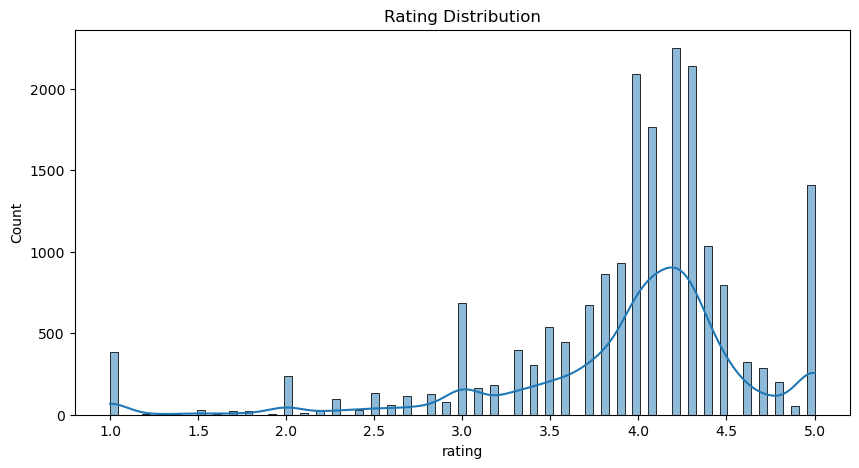

In [12]:
plt.figure(figsize=(10, 5))
sns.histplot(df['rating'].dropna(), kde=True)
plt.title('Rating Distribution')
plt.savefig('rating_dist.png')

# Rating Distribution:
**1.Objective** The purpose of this visualization was to assess customer satisfaction levels and product quality perception across the BigBasket catalog. By plotting the distribution of ratings, the analysis seeks to understand the general sentiment of the customer base.

**2.Methodology**

- **Data Source:** The rating column from the dataset.

- **Preprocessing:** Missing values (NaNs) were explicitly dropped using dropna() before plotting, as approximately 31% of the products (8,636 entries) were unrated.

- **Visualization:** A histogram with a Kernel Density Estimate (KDE) overlay was generated using sns.histplot. This combines bars to show frequency counts in specific bins with a smooth line curve to visualize the overall probability density.

**3.Visual Analysis of the Histogram** The chart (rating_dist.png) reveals a distinct pattern in customer feedback:

- **Left-Skewed Distribution:** The distribution is heavily skewed towards the higher end of the scale (4.0 to 5.0).

- **Peak Frequency:** The highest concentration of ratings falls between 4.0 and 4.5, indicating that the "typical" rated product is considered very good by customers.

- **Low Frequency of Poor Ratings:** There is a very small tail on the left side (ratings 1.0 to 2.0), suggesting that products with consistently poor reviews are rare or perhaps removed from the inventory.

- **Mean Rating:** The descriptive statistics confirm a high average rating of 3.94, which aligns with the visual peak of the histogram.

**4.Business Insight**

- **High Customer Satisfaction:** The overwhelming majority of rated products are viewed positively, which reflects well on BigBasket's quality control and product selection.

- **Rating Bias:** The lack of lower ratings could indicate a "selection bias" where customers are more motivated to rate products they like, or it simply indicates high product quality.

- **Actionable Gap:** With ~31% of products unrated, there is a significant opportunity to
implement post-purchase engagement strategies (like email prompts or gamification) to
gather more data on the unrated inventory.